In [2]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_row", 500)

In [65]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    palette = {"Ridge":"C0", "Multitask Ridge": "C0", "PLS": "C1", "Random Forest": "C2", "CCA": "C3", "Neural Network": "C4",
               "Neural Network (Linear)": "C5", "SVR-RBF": "C7", "XGBoost": "C6"}
    
    g = sns.catplot(x="Domain", y="Score", hue="Model", palette=palette, col="alpha",
                    data=score_df, ci="sd", kind="bar", hue_order=hue_order,
                    row_order=[100.0, 80.0, 60.0, 40.0, 20.0])

    g.set_axis_labels("", "Score (Mean and Standard Deviation across 5 CV folds)")

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")
        ax.axhline(0.2, color="black")

    g.fig.suptitle(title, y=1.08, fontsize=30)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-0.2, 0.2))
#         plt.savefig(save_folder + title, bbox_inches="tight")
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.1, 1.1))
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        
    plt.show()
#     plt.savefig(save_folder + title, bbox_inches="tight")


def plot_all_scores(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   

    score_df = score_df[score_df["Data mul factor"] == "No mixup"]
    
    for metric in score_df["Metric"].unique():

        for score_type in score_df["Score type"].unique():

            filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type)]

            title = title_prefix + metric + " - " + score_type

            plot_scores(filtered_data, metric, score_type, title, save_folder, col_order=col_order, hue_order=hue_order)

## Single output

In [52]:
ridge = pd.read_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='r')
bpridge = pd.read_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='r')

svr = pd.read_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='r')
bpsvr = pd.read_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='r')

rf = pd.read_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='r')
bprf = pd.read_hdf('results/singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='r')


In [4]:
scores = pd.concat([ridge, svr, rf], ignore_index=True)
bp = pd.concat([bpridge, bpsvr, bprf], ignore_index=True)

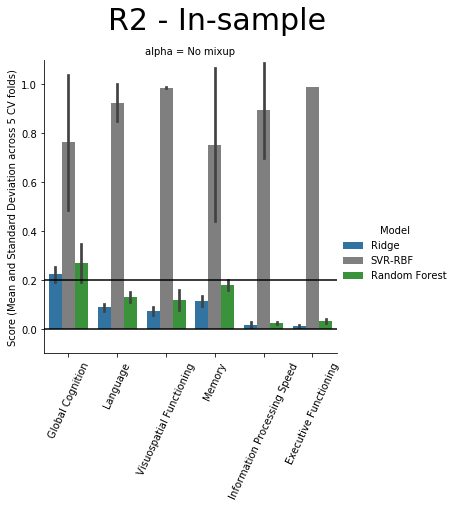

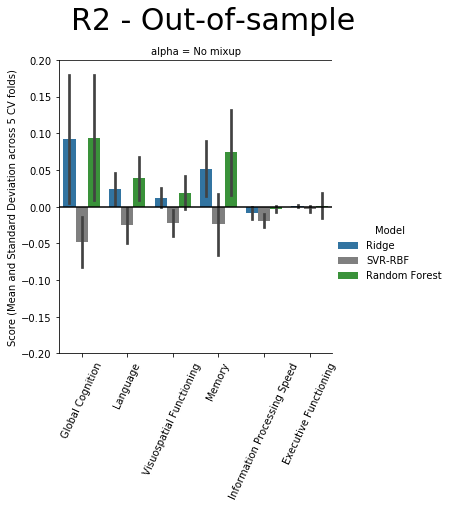

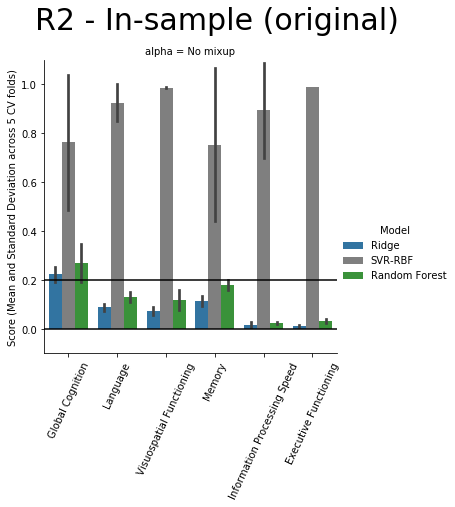

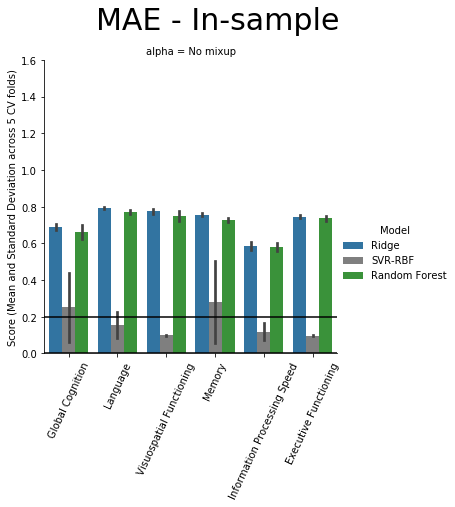

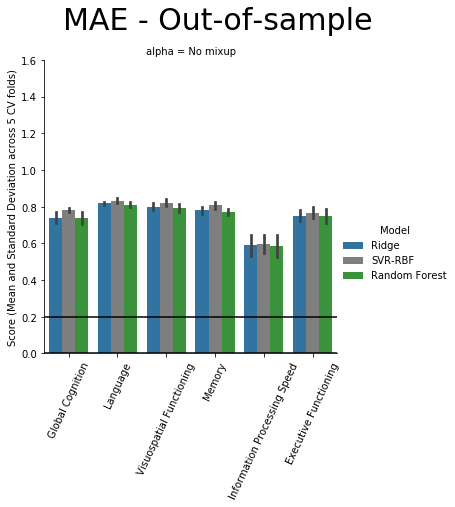

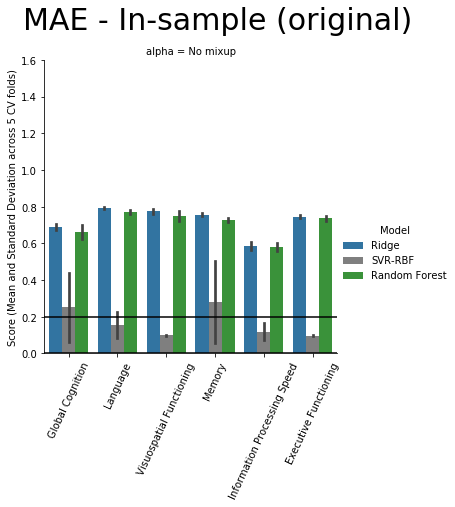

In [66]:
plot_all_scores(scores)

## Multi output

In [42]:
mridge = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_mridge_all.h5', key='p', mode='r')
bpmridge = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_mridge_all.h5', key='p', mode='r')

pls = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_pls_all.h5', key='p', mode='r')
bppls = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_pls_all.h5', key='p', mode='r')

cca = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_cca_all.h5', key='p', mode='r')
bpcca = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_cca_all.h5', key='p', mode='r')

mrf = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_rf_all.h5', key='p', mode='r')
bpmrf = pd.read_hdf('results/multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_rf_all.h5', key='p', mode='r')


In [43]:
mscores = pd.concat([mridge, pls, cca, mrf], ignore_index=True)
mbp = pd.concat([bpmridge, bppls, bpcca, bpmrf], ignore_index=True)

In [44]:
# mbp

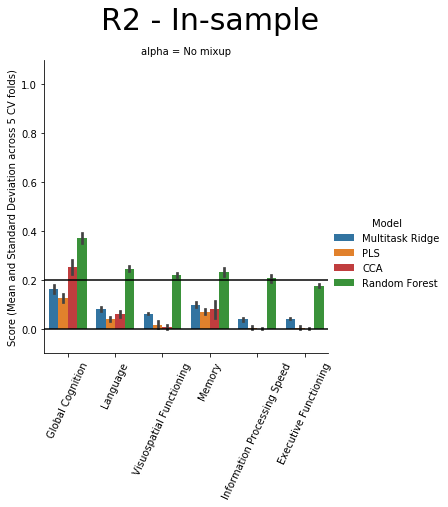

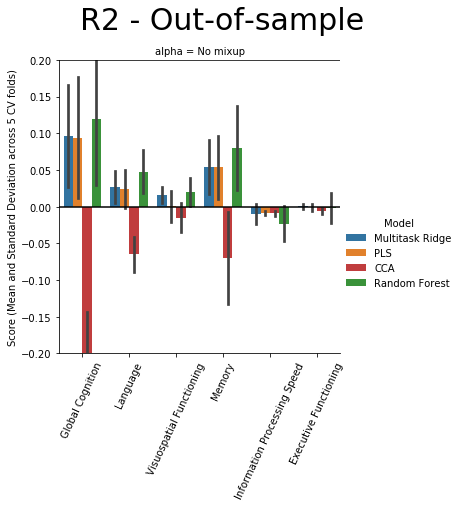

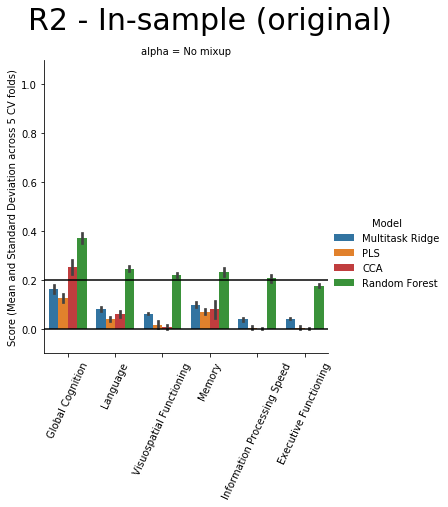

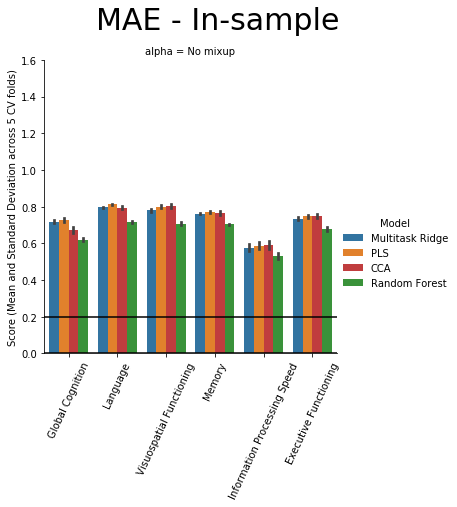

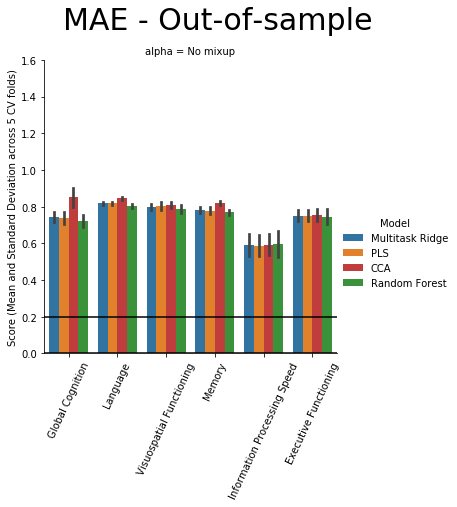

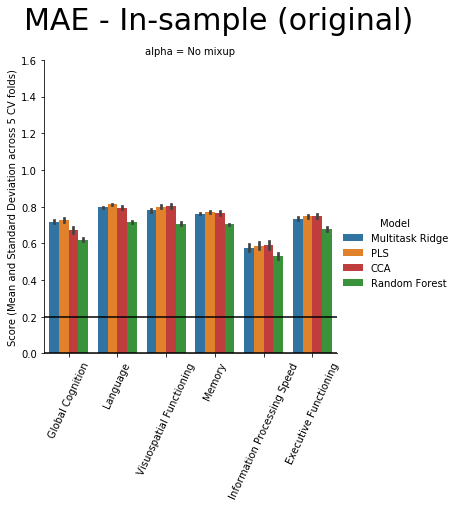

In [67]:
plot_all_scores(mscores)